<a href="https://colab.research.google.com/github/aydanali/ECON3916-Stats-and-ML/blob/main/Lab3%5CLab3_StatsML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: CHN (China), UMC (Upper Middle Income), WLD (World)
country_codes = ['CHN', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [6]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract China for specific calculations
df_chn = df.xs('CHN', axis=1, level=0).copy()

Fetching data...


In [7]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_chn['Natural_Rate_Unemp'] = df_chn['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_chn['Productivity'] = df_chn['GDP_Const'] / df_chn['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_chn['NCO'] = df_chn['Exports_GDP'] - df_chn['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_chn['Budget_Balance'] = df_chn['Tax_Rev_GDP'] - df_chn['Gov_Exp_GDP']

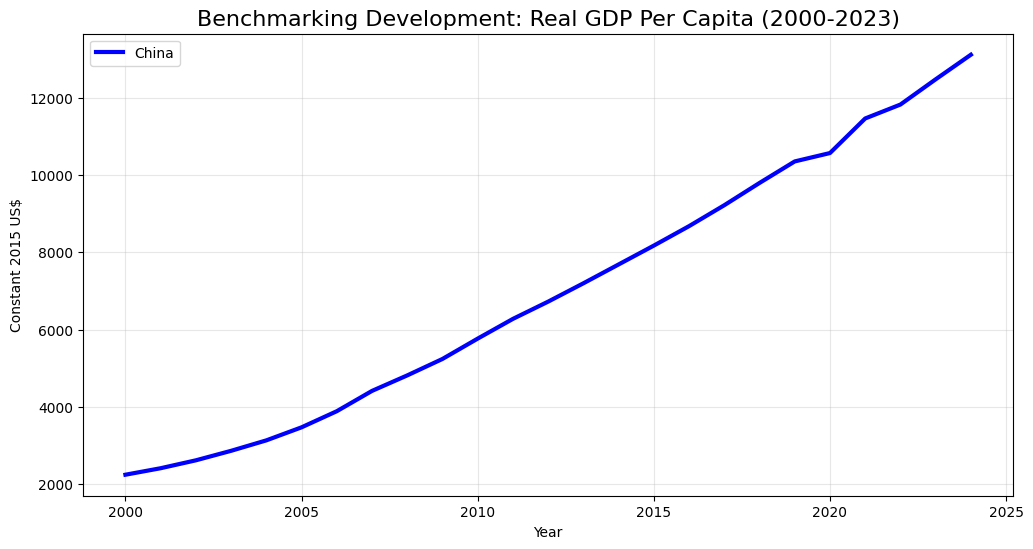

In [8]:
plt.figure(figsize=(12, 6))
# Plot ONLY China
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='China', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

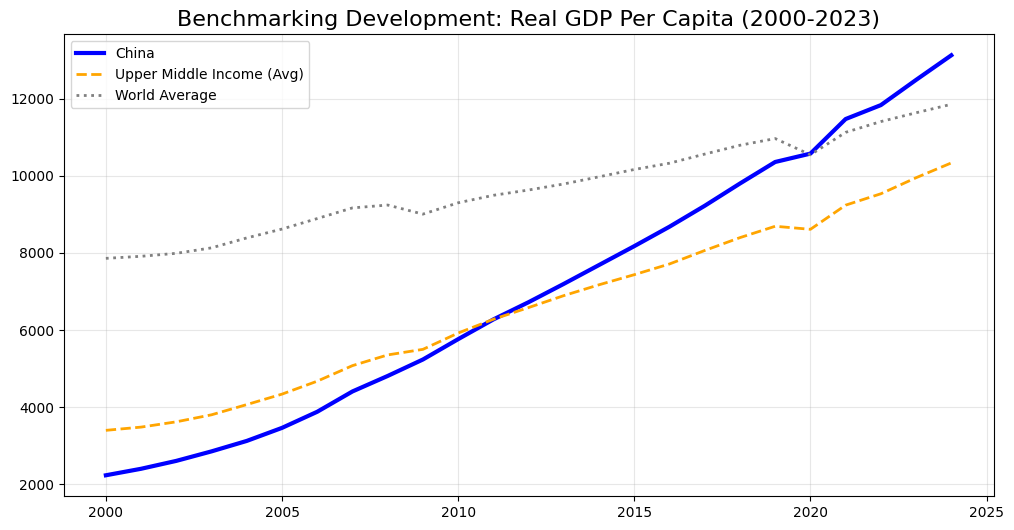

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], label='China', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

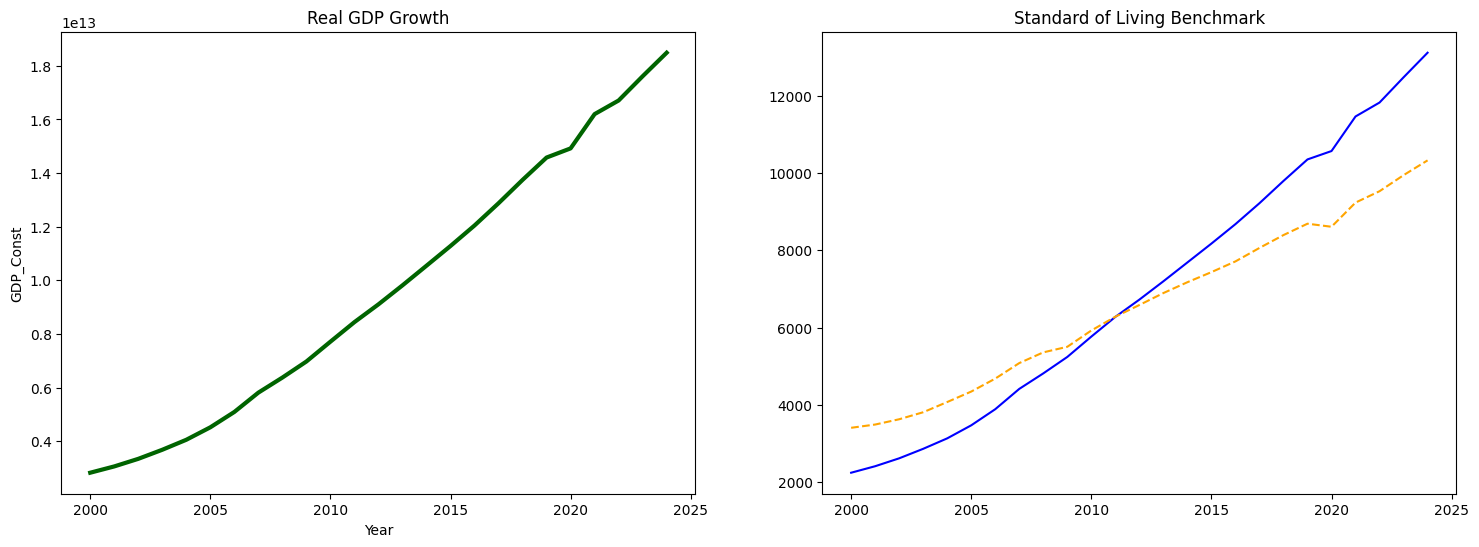

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_chn, x=df_chn.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('CHN', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

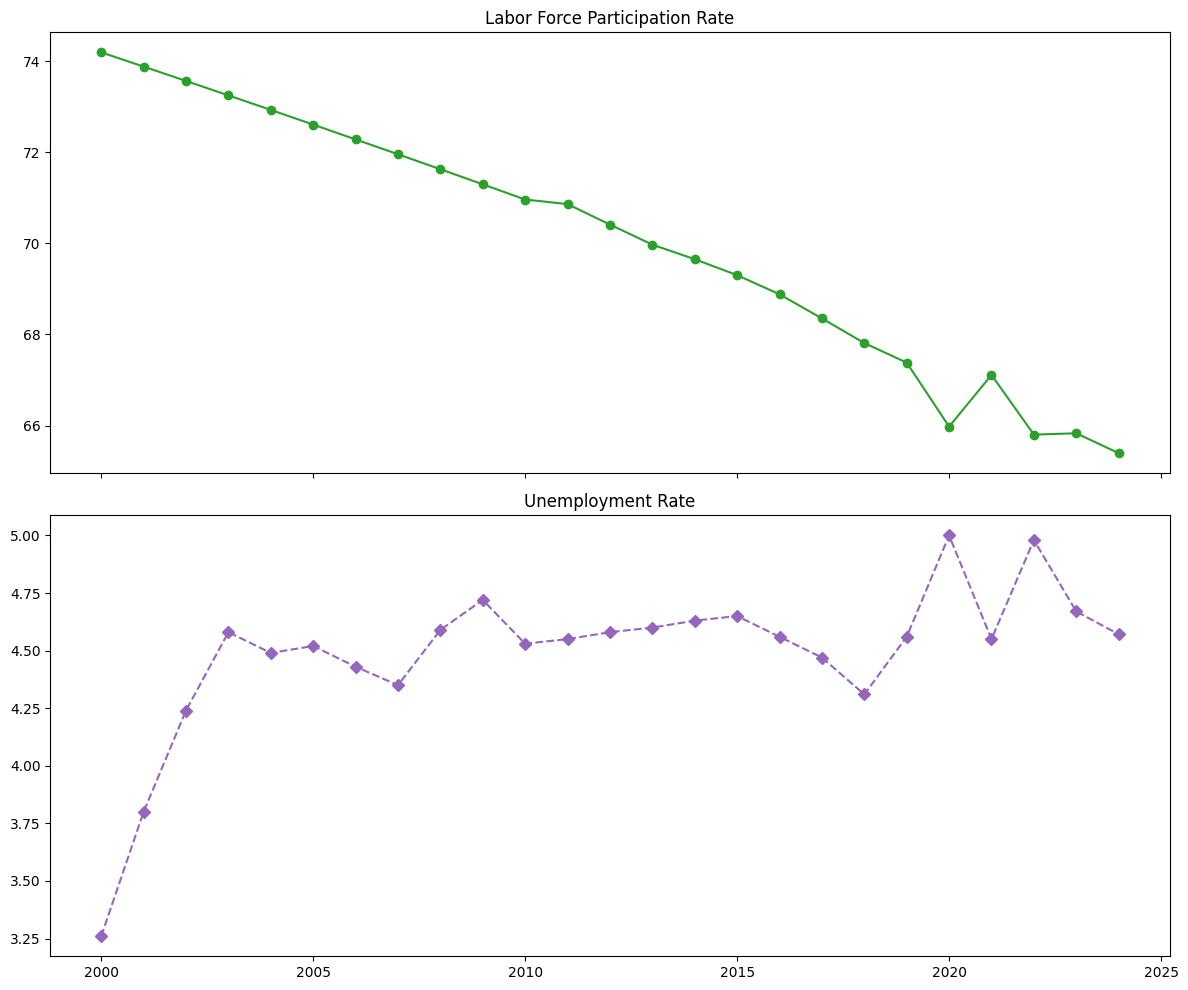

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

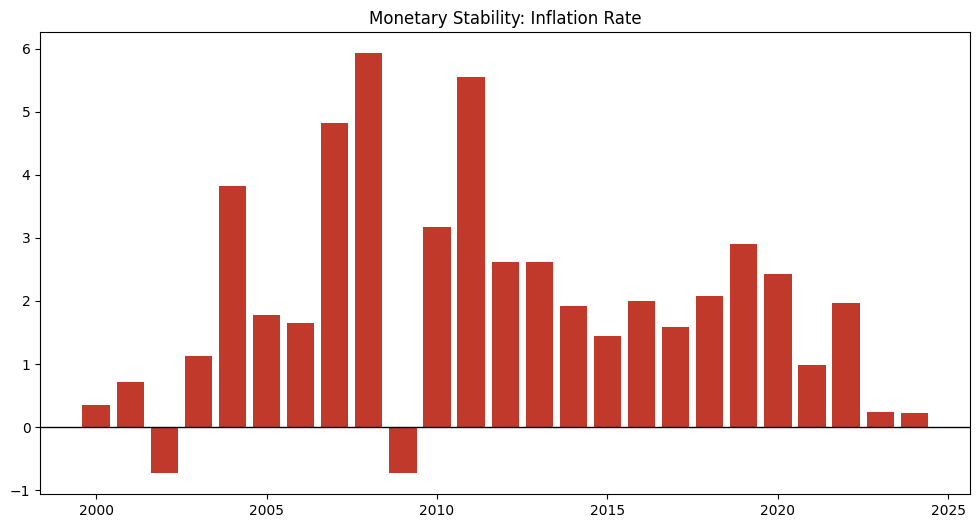

In [13]:
plt.figure(figsize=(12, 6))

plt.bar(df_chn.index, df_chn['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

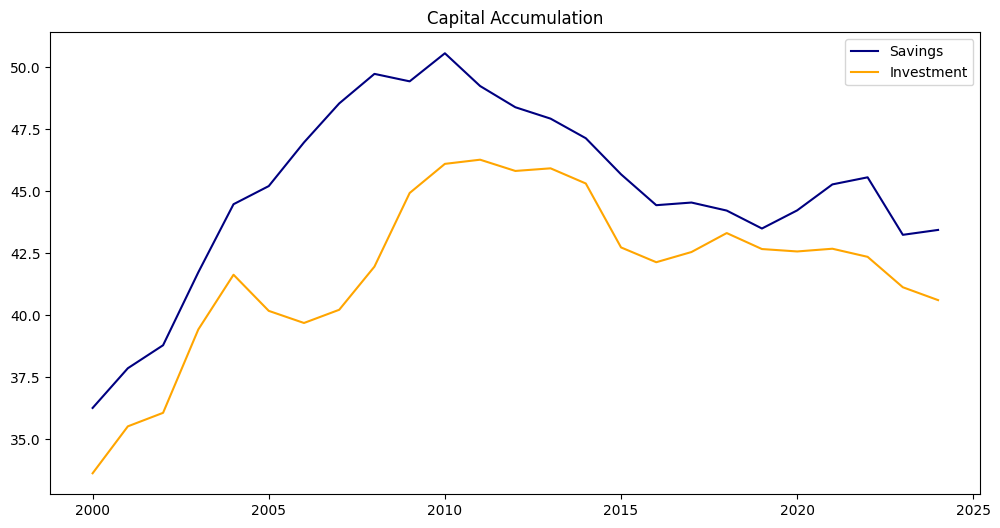

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df_chn.index, df_chn['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_chn.index, df_chn['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

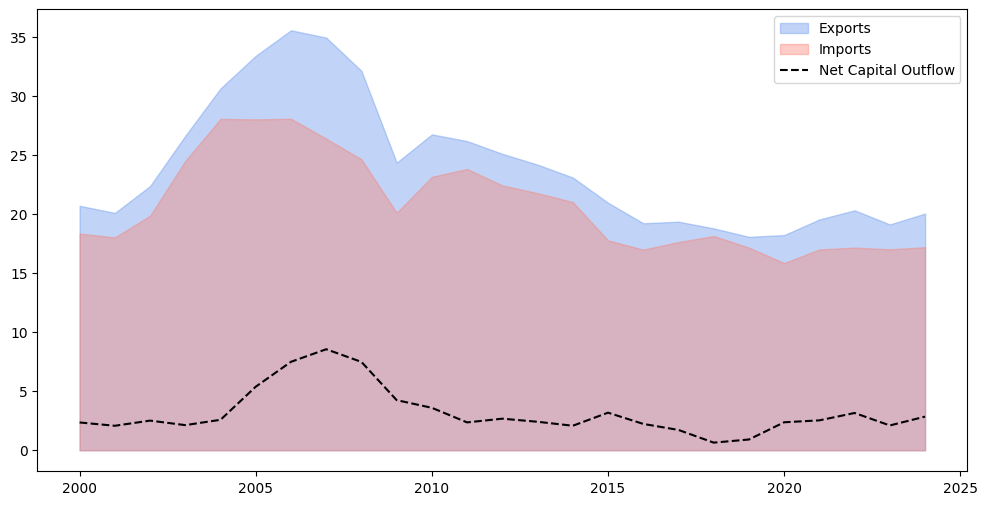

In [15]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_chn.index, df_chn['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_chn.index, df_chn['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_chn.index, df_chn['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()


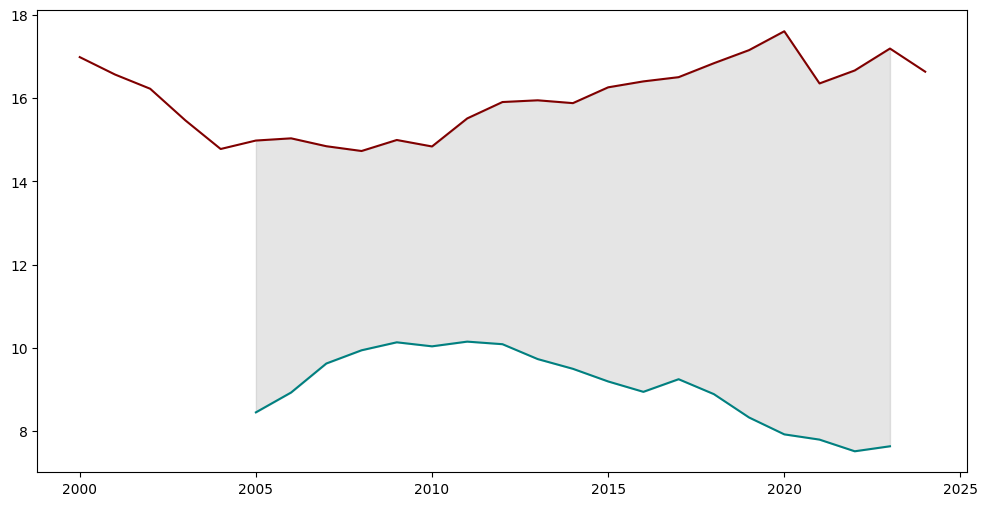

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df_chn.index, df_chn['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_chn.index, df_chn['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

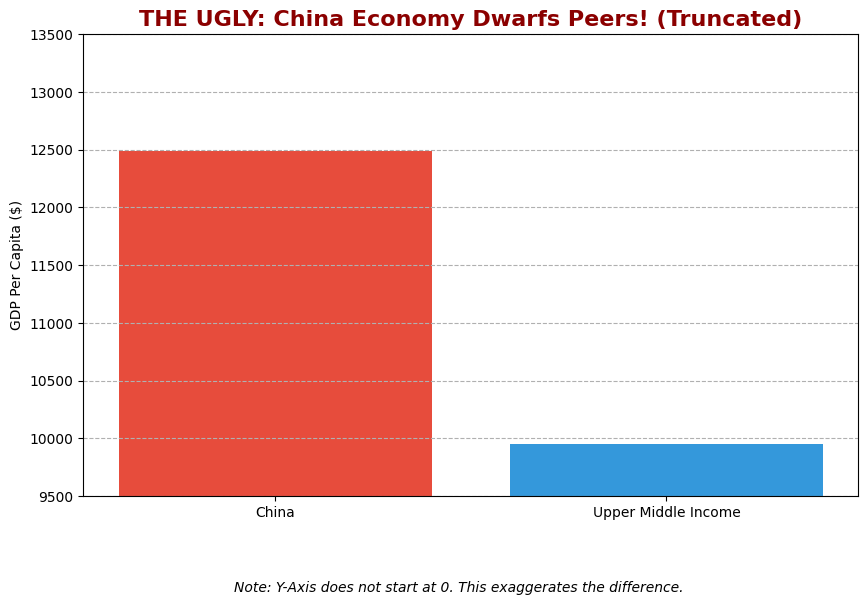

In [19]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
chn_val = df.loc[snapshot_year, ('CHN', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [chn_val, umc_val]
labels = ['China', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# China is approx 4600. UMC is approx 11000.
# Starting axis at 9500 makes UMC look tiny.
plt.ylim(9500, 13500)

plt.title('THE UGLY: China Economy Dwarfs Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

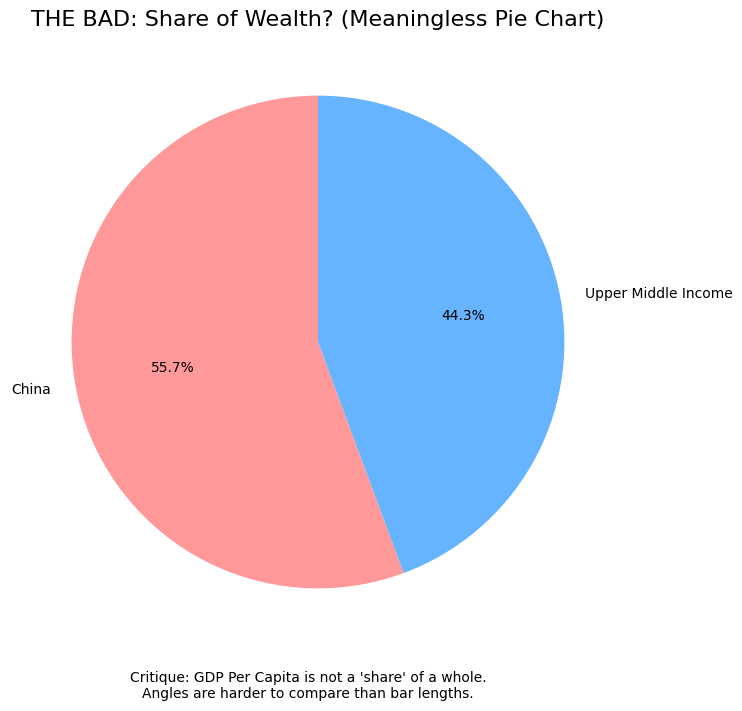

In [20]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

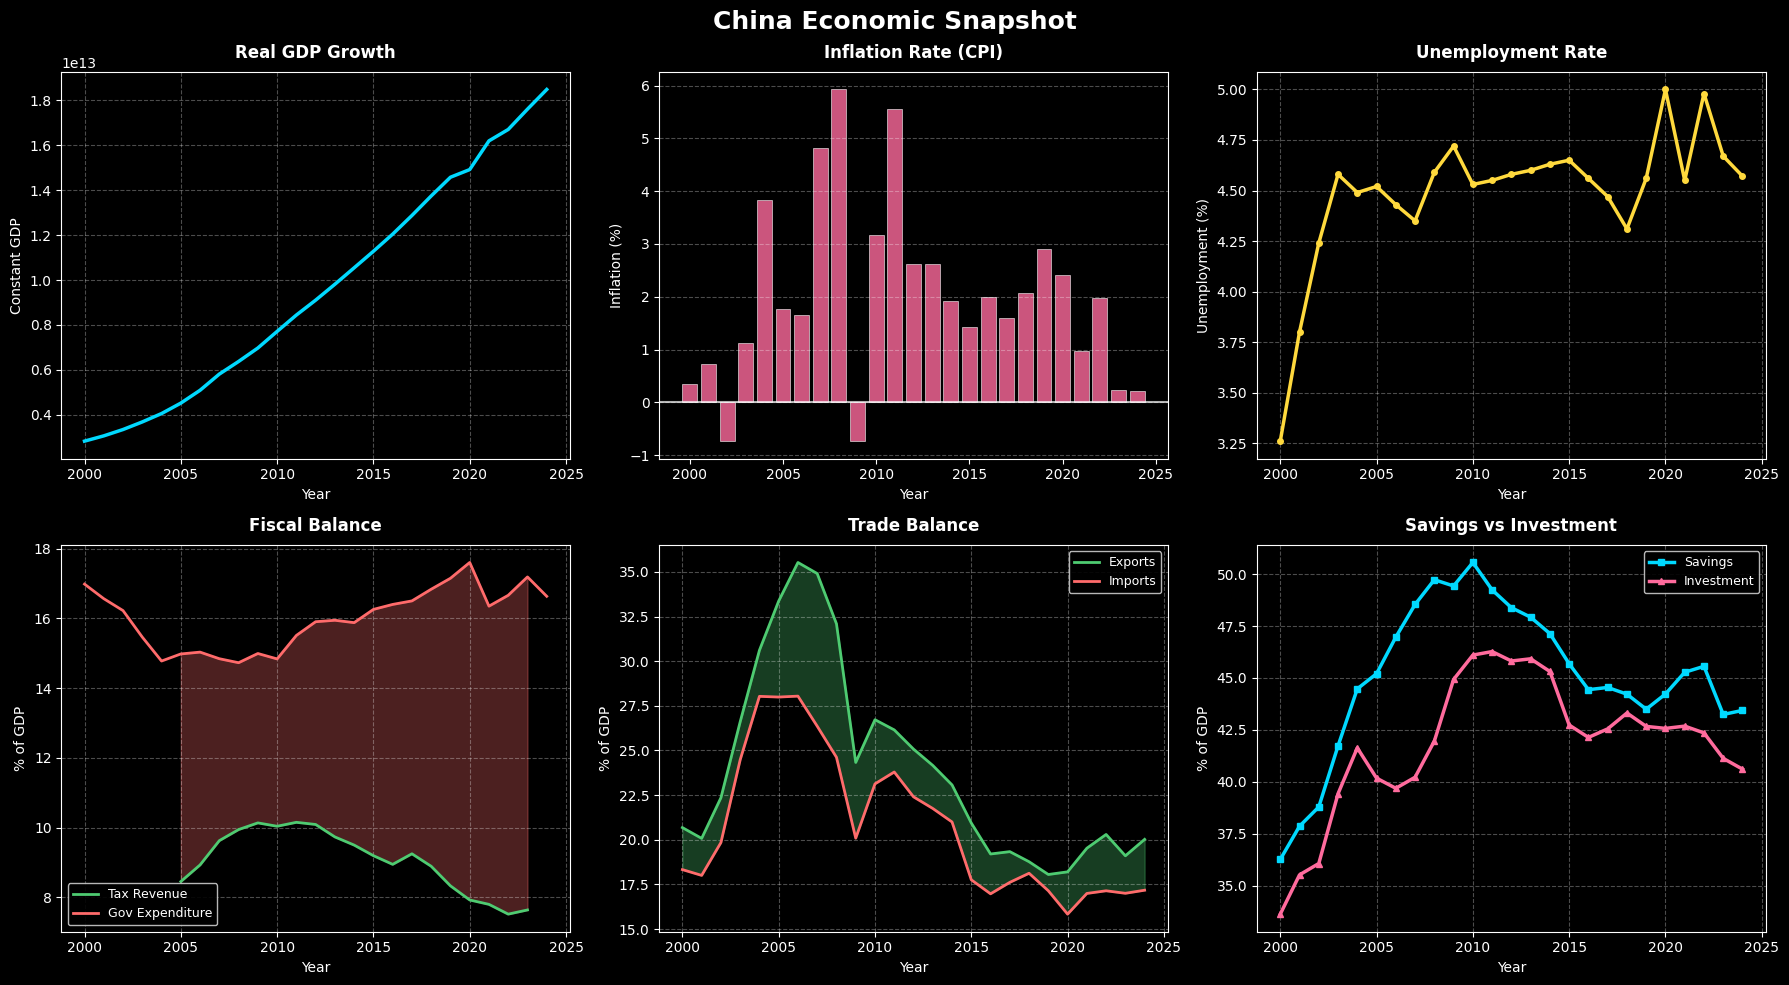

In [23]:
# WRITTEN BY CLAUDE

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set dark background style
plt.style.use('dark_background')

# Create figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Color palette for consistency
colors = {
    'primary': '#00D9FF',
    'secondary': '#FF6B9D',
    'tertiary': '#FFD93D',
    'positive': '#4ECB71',
    'negative': '#FF6B6B'
}

# 1. TOP LEFT: Real GDP (Line chart)
axes[0, 0].plot(df_chn.index, df_chn['GDP_Const'],
                color=colors['primary'], linewidth=2.5)
axes[0, 0].set_title('Real GDP Growth', fontsize=12, fontweight='bold', pad=10)
axes[0, 0].set_xlabel('Year', fontsize=10)
axes[0, 0].set_ylabel('Constant GDP', fontsize=10)
axes[0, 0].grid(True, alpha=0.3, linestyle='--')

# 2. TOP MIDDLE: Inflation Rate (Bar chart with horizontal line at 0)
axes[0, 1].bar(df_chn.index, df_chn['Inflation_CPI'],
               color=colors['secondary'], alpha=0.8, edgecolor='white', linewidth=0.5)
axes[0, 1].axhline(y=0, color='white', linestyle='-', linewidth=1.5, alpha=0.7)
axes[0, 1].set_title('Inflation Rate (CPI)', fontsize=12, fontweight='bold', pad=10)
axes[0, 1].set_xlabel('Year', fontsize=10)
axes[0, 1].set_ylabel('Inflation (%)', fontsize=10)
axes[0, 1].grid(True, alpha=0.3, linestyle='--', axis='y')

# 3. TOP RIGHT: Unemployment Rate (Line chart)
axes[0, 2].plot(df_chn.index, df_chn['Unemployment_Rate'],
                color=colors['tertiary'], linewidth=2.5, marker='o', markersize=4)
axes[0, 2].set_title('Unemployment Rate', fontsize=12, fontweight='bold', pad=10)
axes[0, 2].set_xlabel('Year', fontsize=10)
axes[0, 2].set_ylabel('Unemployment (%)', fontsize=10)
axes[0, 2].grid(True, alpha=0.3, linestyle='--')

# 4. BOTTOM LEFT: Fiscal Balance (Fill between Tax Revenue and Gov Expenditure)
axes[1, 0].plot(df_chn.index, df_chn['Tax_Rev_GDP'],
                color=colors['positive'], linewidth=2, label='Tax Revenue')
axes[1, 0].plot(df_chn.index, df_chn['Gov_Exp_GDP'],
                color=colors['negative'], linewidth=2, label='Gov Expenditure')
axes[1, 0].fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'],
                         where=(df_chn['Tax_Rev_GDP'] >= df_chn['Gov_Exp_GDP']),
                         color=colors['positive'], alpha=0.3, interpolate=True)
axes[1, 0].fill_between(df_chn.index, df_chn['Tax_Rev_GDP'], df_chn['Gov_Exp_GDP'],
                         where=(df_chn['Tax_Rev_GDP'] < df_chn['Gov_Exp_GDP']),
                         color=colors['negative'], alpha=0.3, interpolate=True)
axes[1, 0].set_title('Fiscal Balance', fontsize=12, fontweight='bold', pad=10)
axes[1, 0].set_xlabel('Year', fontsize=10)
axes[1, 0].set_ylabel('% of GDP', fontsize=10)
axes[1, 0].legend(loc='best', framealpha=0.9, fontsize=9)
axes[1, 0].grid(True, alpha=0.3, linestyle='--')

# 5. BOTTOM MIDDLE: Trade Balance (Fill between Exports and Imports)
axes[1, 1].plot(df_chn.index, df_chn['Exports_GDP'],
                color=colors['positive'], linewidth=2, label='Exports')
axes[1, 1].plot(df_chn.index, df_chn['Imports_GDP'],
                color=colors['negative'], linewidth=2, label='Imports')
axes[1, 1].fill_between(df_chn.index, df_chn['Exports_GDP'], df_chn['Imports_GDP'],
                         where=(df_chn['Exports_GDP'] >= df_chn['Imports_GDP']),
                         color=colors['positive'], alpha=0.3, interpolate=True)
axes[1, 1].fill_between(df_chn.index, df_chn['Exports_GDP'], df_chn['Imports_GDP'],
                         where=(df_chn['Exports_GDP'] < df_chn['Imports_GDP']),
                         color=colors['negative'], alpha=0.3, interpolate=True)
axes[1, 1].set_title('Trade Balance', fontsize=12, fontweight='bold', pad=10)
axes[1, 1].set_xlabel('Year', fontsize=10)
axes[1, 1].set_ylabel('% of GDP', fontsize=10)
axes[1, 1].legend(loc='best', framealpha=0.9, fontsize=9)
axes[1, 1].grid(True, alpha=0.3, linestyle='--')

# 6. BOTTOM RIGHT: Savings vs Investment (Dual lines)
axes[1, 2].plot(df_chn.index, df_chn['Gross_Dom_Savings'],
                color=colors['primary'], linewidth=2.5, marker='s',
                markersize=4, label='Savings')
axes[1, 2].plot(df_chn.index, df_chn['Gross_Cap_Formation'],
                color=colors['secondary'], linewidth=2.5, marker='^',
                markersize=4, label='Investment')
axes[1, 2].set_title('Savings vs Investment', fontsize=12, fontweight='bold', pad=10)
axes[1, 2].set_xlabel('Year', fontsize=10)
axes[1, 2].set_ylabel('% of GDP', fontsize=10)
axes[1, 2].legend(loc='best', framealpha=0.9, fontsize=9)
axes[1, 2].grid(True, alpha=0.3, linestyle='--')

# Main title
fig.suptitle('China Economic Snapshot', fontsize=18, fontweight='bold', y=0.98)

# Tight layout to prevent overlap
plt.tight_layout()

# Show the dashboard
plt.show()
